# House rent Prediction using Regression Algorithms

## Importing the pandas library and 99 acres data set

In [336]:
import pandas as pd

real_estate_data = pd.read_csv("data_set_99acres.csv")
real_estate_data.drop('Unnamed: 0', axis='columns', inplace=True)
real_estate_data.head(5)

,Description,Price,Sq_feet
0,2 BHK Residential Apartment for rent in Gowlid...,18000,1400
1,3 BHK Residential Apartment for rent in Gachib...,45000,1834
2,1 BHK Residential Apartment for rent in Domalguda,8000,330
3,"1 BHK Residential Apartment for rent in Hitex,...",8000,510
4,3 BHK Residential Apartment for rent in Whitef...,50000,1850


## Converting the price column to numerical data

In [337]:
price_num = []
for price in range(real_estate_data['Price'].count()):
#     print(price)
    try:
        price_num.append(int(real_estate_data['Price'][price]))
    except:
        price_num.append(None)
        
# print(type(price_num[0]))
real_estate_data["Price"] = price_num
real_estate_data.head(5)

,Description,Price,Sq_feet
0,2 BHK Residential Apartment for rent in Gowlid...,18000.0,1400
1,3 BHK Residential Apartment for rent in Gachib...,45000.0,1834
2,1 BHK Residential Apartment for rent in Domalguda,8000.0,330
3,"1 BHK Residential Apartment for rent in Hitex,...",8000.0,510
4,3 BHK Residential Apartment for rent in Whitef...,50000.0,1850


## Checking the numerical columns present in the data set

In [241]:
real_estate_data.dtypes[real_estate_data.dtypes!='object']

Price      float64
Sq_feet      int64
dtype: object

## Plotting the Numerical Datas

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Sq_feet'}>]], dtype=object)

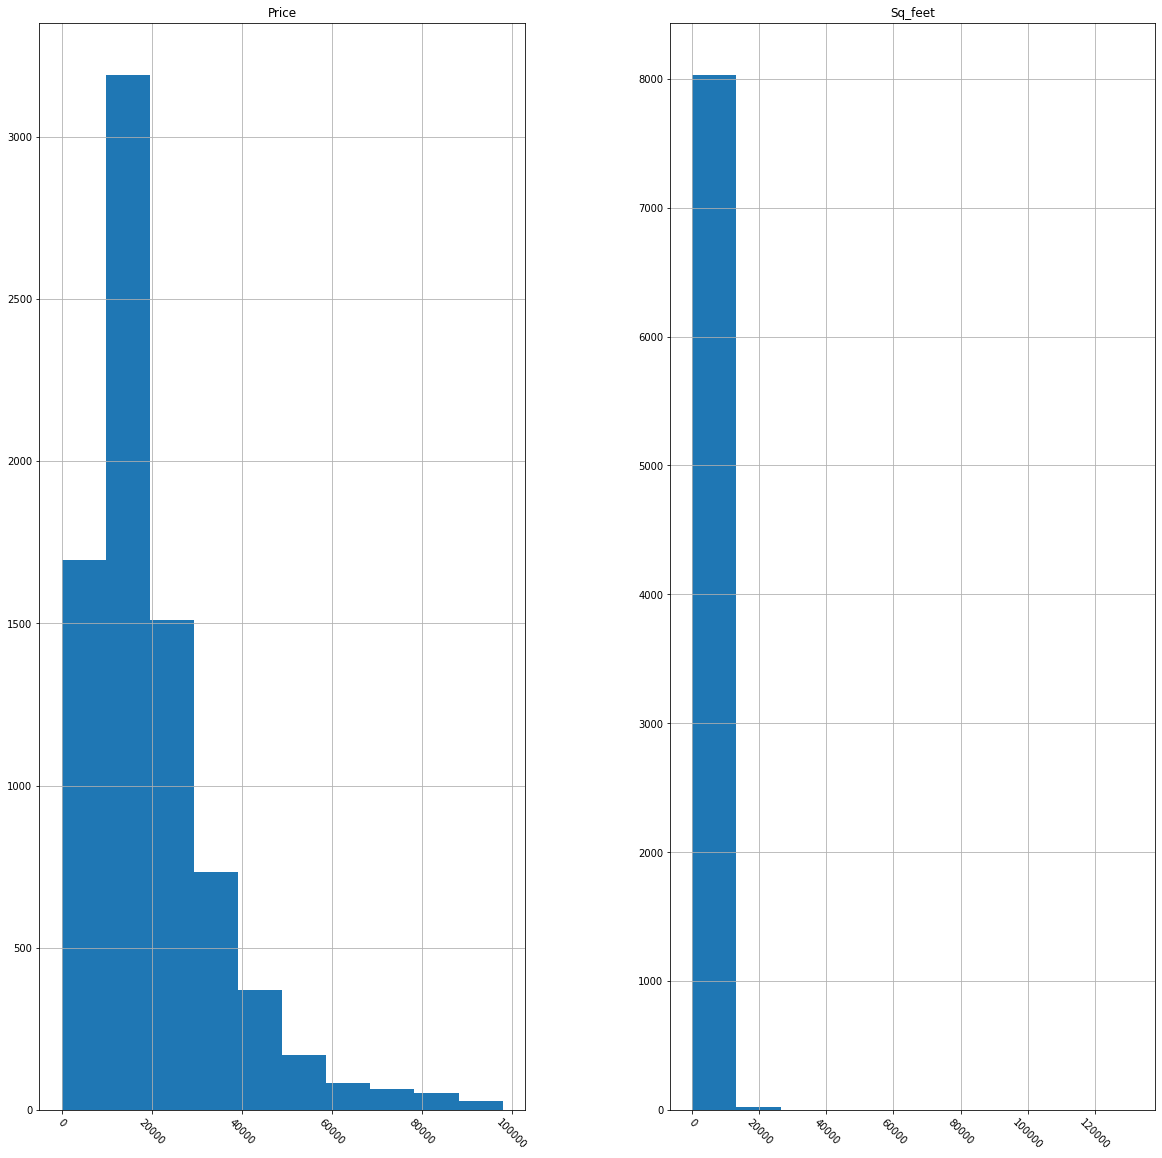

In [242]:
real_estate_data.hist(figsize=(20,20), xrot=-45)

## Checking the null values in the data

In [243]:
real_estate_data.isnull().sum()

Description      0
Price          165
Sq_feet          0
dtype: int64

## Dropping the null values from the price column

In [244]:
real_estate_data.dropna(subset=["Price"], inplace=True)
real_estate_data.shape

(7893, 3)

## Extracting the number of bedrooms the house/appartment have from description and creating a new column with int data type

In [245]:
values = []
for i in range(real_estate_data['Description'].count()):
    try:
        values.append(int(int(real_estate_data['Description'][i][0])))
    except:
        values.append(None)
        
print(type(values[0]))
real_estate_data["Flat_type"] = values
real_estate_data.head(5)

<class 'int'>


,Description,Price,Sq_feet,Flat_type
0,2 BHK Residential Apartment for rent in Gowlid...,18000.0,1400,2.0
1,3 BHK Residential Apartment for rent in Gachib...,45000.0,1834,3.0
2,1 BHK Residential Apartment for rent in Domalguda,8000.0,330,1.0
3,"1 BHK Residential Apartment for rent in Hitex,...",8000.0,510,1.0
4,3 BHK Residential Apartment for rent in Whitef...,50000.0,1850,3.0


## Again checkinh for null values

In [246]:
real_estate_data.isnull().sum()

Description      0
Price            0
Sq_feet          0
Flat_type      240
dtype: int64

## Removing the null values present in the flat type column

In [247]:
real_estate_data.dropna(subset=["Flat_type"], inplace=True)

## After the preprocessing of data checking for numerical columns in data set for training

In [248]:
real_estate_data.dtypes[real_estate_data.dtypes!='object']

Price        float64
Sq_feet        int64
Flat_type    float64
dtype: object

## Making sure we don't have anymore null values.

In [250]:
real_estate_data.isnull().sum()

Description    0
Price          0
Sq_feet        0
Flat_type      0
dtype: int64

## Creating X, y features and target variables from our data set for training model

In [251]:
# Data Allocation to x, y
import numpy as np

X = real_estate_data.iloc[:, 2:].values
y = real_estate_data.iloc[:, 1].values
# type(X)
# X = X.reshape(-1,1)
# type(X)
# X.reshape(-1,1)
X

array([[1.400e+03, 2.000e+00],
       [1.834e+03, 3.000e+00],
       [3.300e+02, 1.000e+00],
       ...,
       [1.500e+03, 1.000e+00],
       [2.900e+03, 2.000e+00],
       [2.900e+03, 1.000e+00]])

## Splitting the data to train test

In [309]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## Importing necessary modules to build our model

In [310]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
# from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Linear Regressor

In [311]:
# Linear Reggressor

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

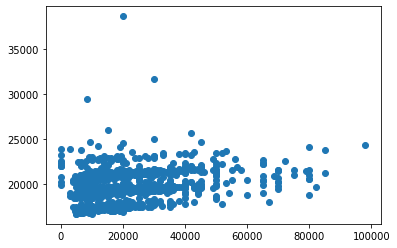

In [312]:
y_pred = regressor.predict(X_test)
y_pred
plt.scatter(y_test, y_pred)

In [313]:
regressor.predict([[650, 2]])

array([18803.71723389])

In [314]:
print(regressor.coef_)
print(regressor.intercept_)

[7.28887217e-01 1.79486150e+03]
14740.217542005432


## RandomForest Regressor

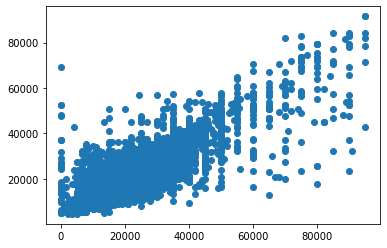

In [315]:
random_reg = RandomForestRegressor(n_estimators=600, max_features='auto')
random_reg.fit(X_train, y_train)

plt.scatter(y_train, random_reg.predict(X_train))

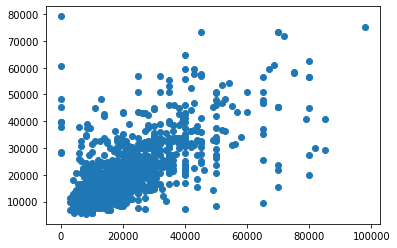

In [316]:
rand_pred = random_reg.predict(X_test)
# rand_pred
plt.scatter(y_test, rand_pred)

In [317]:
random_reg.predict([[2400, 2]])

array([27463.71872572])

## K Neighbours Regressor

In [318]:
k_reg = KNeighborsRegressor(n_neighbors=30)
k_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=30)

In [319]:
k_pred = k_reg.predict(X_test)
k_pred

array([10328.33333333, 14316.66666667, 14260.        , ...,
       33800.        ,  9446.66666667, 19191.66666667])

In [320]:
k_reg.predict([[1100, 2]])

array([14260.])

## Support Vector Regressor (SVR)

In [321]:
svr_reg = SVR(kernel='linear')
svr_reg.fit(X_train, y_train)

SVR(kernel='linear')

In [322]:
svr_pred = svr_reg.predict(X_test)
svr_pred

array([12301.13093777, 14615.90990009, 15175.05668712, ...,
       25106.7225593 , 10541.97762032, 18224.93912359])

In [323]:
svr_reg.predict([[2200, 30]])

array([30639.57167442])

## Logistic Regression

In [324]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [325]:
log_pred = log_reg.predict(X_test)
log_pred

array([15000., 15000., 15000., ..., 15000., 15000., 15000.])

In [326]:
log_reg.predict([[900, 2]])

array([15000.])

## Finding the best accuracy for the above used algorithms using R2 Score Method.

In [327]:
from sklearn.metrics import r2_score

# Linear Regression
linear_accuracy = r2_score(y_test, k_pred)
print(linear_accuracy)

0.4661245673911656


In [328]:
# Logistic Regression
linear_accuracy = r2_score(y_test, log_pred)
print(linear_accuracy)

-0.10501126353905699


In [329]:
# SVR Regression
linear_accuracy = r2_score(y_test, svr_pred)
print(linear_accuracy)

-0.05915259302161724


In [330]:
# KNN Regression
linear_accuracy = r2_score(y_test, k_pred)
print(linear_accuracy)

0.4661245673911656


In [331]:
# Random forest Regression
linear_accuracy = r2_score(y_test, random_reg.predict(X_test))
print(linear_accuracy)

0.4447467626043885
